## **Python para Data Science: Clase 07**

### Actividad Práctica: Numpy, Pandas y Librerías de Visualización

#### **Actividad 1: Explorando Series y DataFrames con Pandas y Visualizando la Información**

1. Crear una Serie a partir de un diccionario:
 
 ```data = {
    'País': ['Chile', 'Argentina', 'Perú', 'Colombia', 'Uruguay'],
    'Población (millones)': [19.5, 45.3, 32.1, 50.3, 3.5],
    'PIB (USD miles de millones)': [320.0, 450.5, 226.8, 330.2, 59.2],
    'Esperanza de vida (años)': [80.2, 76.1, 75.6, 74.5, 77.8] }
```

2. Extraer sólo los países con PIB mayor a 300
3. Ordenar el DataFrame por “Esperanza de vida” de mayor a menor.
4. Calcular el PIB per cápita (en USD) y agregarlo como columna.
5. Crear una columna “Nivel de vida” que muestre la siguiente información:
    - “Alta” si esperanza ≥ 78
    - “Media” si entre 75 y 78
    - “Baja” si < 75
6. Calcular la media y desviación estándar de la población.
7. Encontrar el país con mayor y menor PIB per cápita.
8. Crear un Histograma de “Población (millones)”.
9. Crear un gráfico de dispersión de “PIB per cápita” vs “Esperanza de vida”.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# 1. Crear el DataFrame a partir del diccionario
data = {
    'País': ['Chile', 'Argentina', 'Perú', 'Colombia', 'Uruguay'],
    'Población (millones)': [19.5, 45.3, 32.1, 50.3, 3.5],
    'PIB (USD miles de millones)': [320.0, 450.5, 226.8, 330.2, 59.2],
    'Esperanza de vida (años)': [80.2, 76.1, 75.6, 74.5, 77.8]
}

In [14]:
df = pd.DataFrame(data)
df #print(df.head(5)) -> el print no es necesario en Jupyter, ya que la última línea se muestra automáticamente

,País,Población (millones),PIB (USD miles de millones),Esperanza de vida (años)
0,Chile,19.5,320.0,80.2
1,Argentina,45.3,450.5,76.1
2,Perú,32.1,226.8,75.6
3,Colombia,50.3,330.2,74.5
4,Uruguay,3.5,59.2,77.8


In [ ]:
# 2. Extraer países con PIB mayor a 300
df_pib_mayor_300 = df[df['PIB (USD miles de millones)'] > 300]

In [24]:
df_pib_mayor_300

,País,Población (millones),PIB (USD miles de millones),Esperanza de vida (años)
0,Chile,19.5,320.0,80.2
1,Argentina,45.3,450.5,76.1
3,Colombia,50.3,330.2,74.5


In [55]:
# 3. Ordenar por “Esperanza de vida” de mayor a menor
df_ordenado_vida = df.sort_values(by='Esperanza de vida (años)', ascending=False)

In [56]:
df_ordenado_vida

,País,Población (millones),PIB (USD miles de millones),Esperanza de vida (años),PIB per cápita (USD)
0,Chile,19.5,320.0,80.2,16410.256410
4,Uruguay,3.5,59.2,77.8,16914.285714
1,Argentina,45.3,450.5,76.1,9944.812362
2,Perú,32.1,226.8,75.6,7065.420561
3,Colombia,50.3,330.2,74.5,6564.612326


In [ ]:
# 4. Calcular PIB per cápita (en USD) y agregarlo como columna
# Esto se puede optimizar realizando una función que realice el cálculo
df['PIB per cápita (USD)'] = (df['PIB (USD miles de millones)'] * 1e9) / (df['Población (millones)'] * 1e6)

In [58]:
df

,País,Población (millones),PIB (USD miles de millones),Esperanza de vida (años),PIB per cápita (USD)
0,Chile,19.5,320.0,80.2,16410.256410
1,Argentina,45.3,450.5,76.1,9944.812362
2,Perú,32.1,226.8,75.6,7065.420561
3,Colombia,50.3,330.2,74.5,6564.612326
4,Uruguay,3.5,59.2,77.8,16914.285714


In [66]:
# 5. Crear columna “Nivel de vida”
def nivel_vida(esperanza): #estilo de programación snake_case
    if esperanza >= 78:
        return "Alta"
    elif esperanza >= 75:
        return "Media"
    else:
        return "Baja"
df['Nivel de vida'] = df['Esperanza de vida (años)'].apply(nivel_vida)

In [63]:
df

,País,Población (millones),PIB (USD miles de millones),Esperanza de vida (años),PIB per cápita (USD),Nivel de vida
0,Chile,19.5,320.0,80.2,16410.256410,Alta
1,Argentina,45.3,450.5,76.1,9944.812362,Media
2,Perú,32.1,226.8,75.6,7065.420561,Media
3,Colombia,50.3,330.2,74.5,6564.612326,Baja
4,Uruguay,3.5,59.2,77.8,16914.285714,Media


In [67]:
df.describe()

,Población (millones),PIB (USD miles de millones),Esperanza de vida (años),PIB per cápita (USD)
count,5.000000,5.000000,5.000000,5.000000
mean,30.140000,277.340000,76.840000,11379.877475
std,19.124539,145.548782,2.223286,4994.875263
min,3.500000,59.200000,74.500000,6564.612326
25%,19.500000,226.800000,75.600000,7065.420561
50%,32.100000,320.000000,76.100000,9944.812362
75%,45.300000,330.200000,77.800000,16410.256410
max,50.300000,450.500000,80.200000,16914.285714


In [ ]:
# 6. Media y desviación estándar de la población
media_poblacion = df['Población (millones)'].mean() #promedio
std_poblacion = df['Población (millones)'].std() #desviación estándar

#### Redondeando a dos decimales con Round

In [71]:
round(media_poblacion, 2)

30.14

In [77]:
# 7. País con mayor y menor PIB per cápita
pais_mayor_pibpc = df.loc[df['PIB per cápita (USD)'].idxmax(), 'País']
pais_menor_pibpc = df.loc[df['PIB per cápita (USD)'].idxmin(), 'País']

In [73]:
pais_mayor_pibpc, pais_menor_pibpc

('Uruguay', 'Colombia')

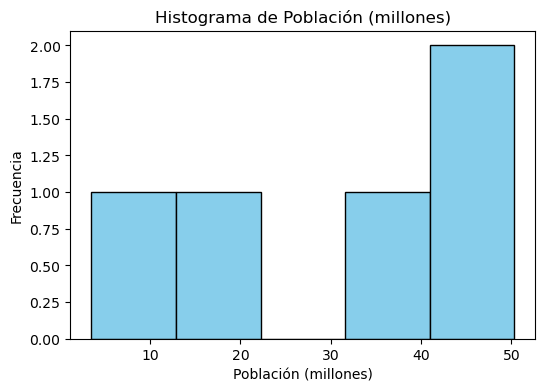

In [89]:
# 8. Histograma de “Población (millones)”
plt.figure(figsize=(6,4))
plt.hist(df['Población (millones)'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histograma de Población (millones)')
plt.xlabel('Población (millones)')
plt.ylabel('Frecuencia')
plt.show()

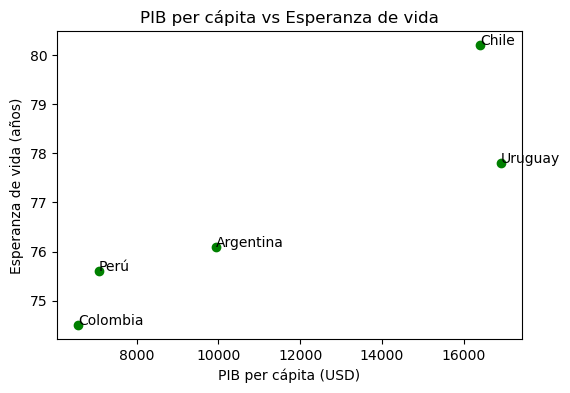

In [ ]:
# 9. Gráfico de dispersión de “PIB per cápita” vs “Esperanza de vida”
plt.figure(figsize=(6,4))
plt.scatter(df['PIB per cápita (USD)'], df['Esperanza de vida (años)'], color='green')
for i, pais in enumerate(df['País']):
    plt.annotate(pais, (df['PIB per cápita (USD)'][i], df['Esperanza de vida (años)'][i]))
plt.title('PIB per cápita vs Esperanza de vida')
plt.xlabel('PIB per cápita (USD)')
plt.ylabel('Esperanza de vida (años)')
plt.show()

In [ ]:
print('Hola mundo!')

In [15]:
# Mostrar resultados clave
print("Media de población (millones):", media_poblacion)
print("Desviación estándar de población (millones):", std_poblacion)
print("País con mayor PIB per cápita:", pais_mayor_pibpc)
print("País con menor PIB per cápita:", pais_menor_pibpc)
df

Media de población (millones): 30.139999999999997
Desviación estándar de población (millones): 19.124539210135232
País con mayor PIB per cápita: Uruguay
País con menor PIB per cápita: Colombia


,País,Población (millones),PIB (USD miles de millones),Esperanza de vida (años),PIB per cápita (USD),Nivel de vida
0,Chile,19.5,320.0,80.2,16410.256410,Alta
1,Argentina,45.3,450.5,76.1,9944.812362,Media
2,Perú,32.1,226.8,75.6,7065.420561,Media
3,Colombia,50.3,330.2,74.5,6564.612326,Baja
4,Uruguay,3.5,59.2,77.8,16914.285714,Media
